<a href="https://colab.research.google.com/github/MuhammadNoman2/Research-Paper-/blob/main/PIMA_hybrid_2_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc
import joblib
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
df_copy = pd.read_csv('pima-indians-diabetes.csv')

In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_copy.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Number of Rows = ",df_copy.shape[0])
print("Number of Columns = ",df_copy.shape[1])

Number of Rows =  768
Number of Columns =  9


In [ ]:
df_copy.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Figure size 2000x300 with 0 Axes>

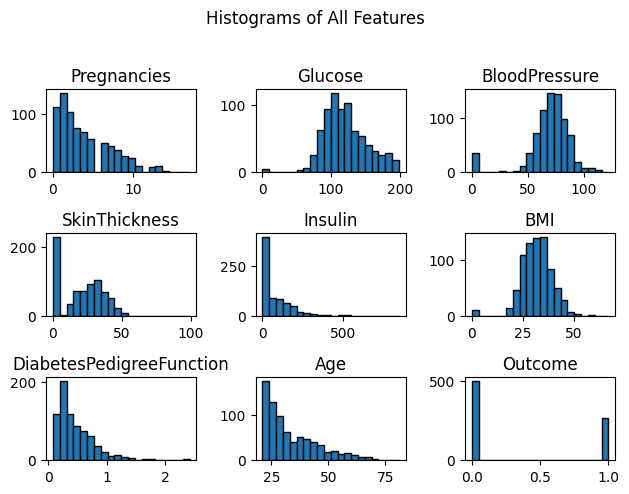

In [ ]:
plt.figure(figsize=(20, 3))
df_copy.hist(bins=20, edgecolor='black', grid=False)
plt.suptitle('Histograms of All Features', y=1.02)
plt.tight_layout()
plt.show()



In [ ]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_copy[['Glucose','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1


In [ ]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

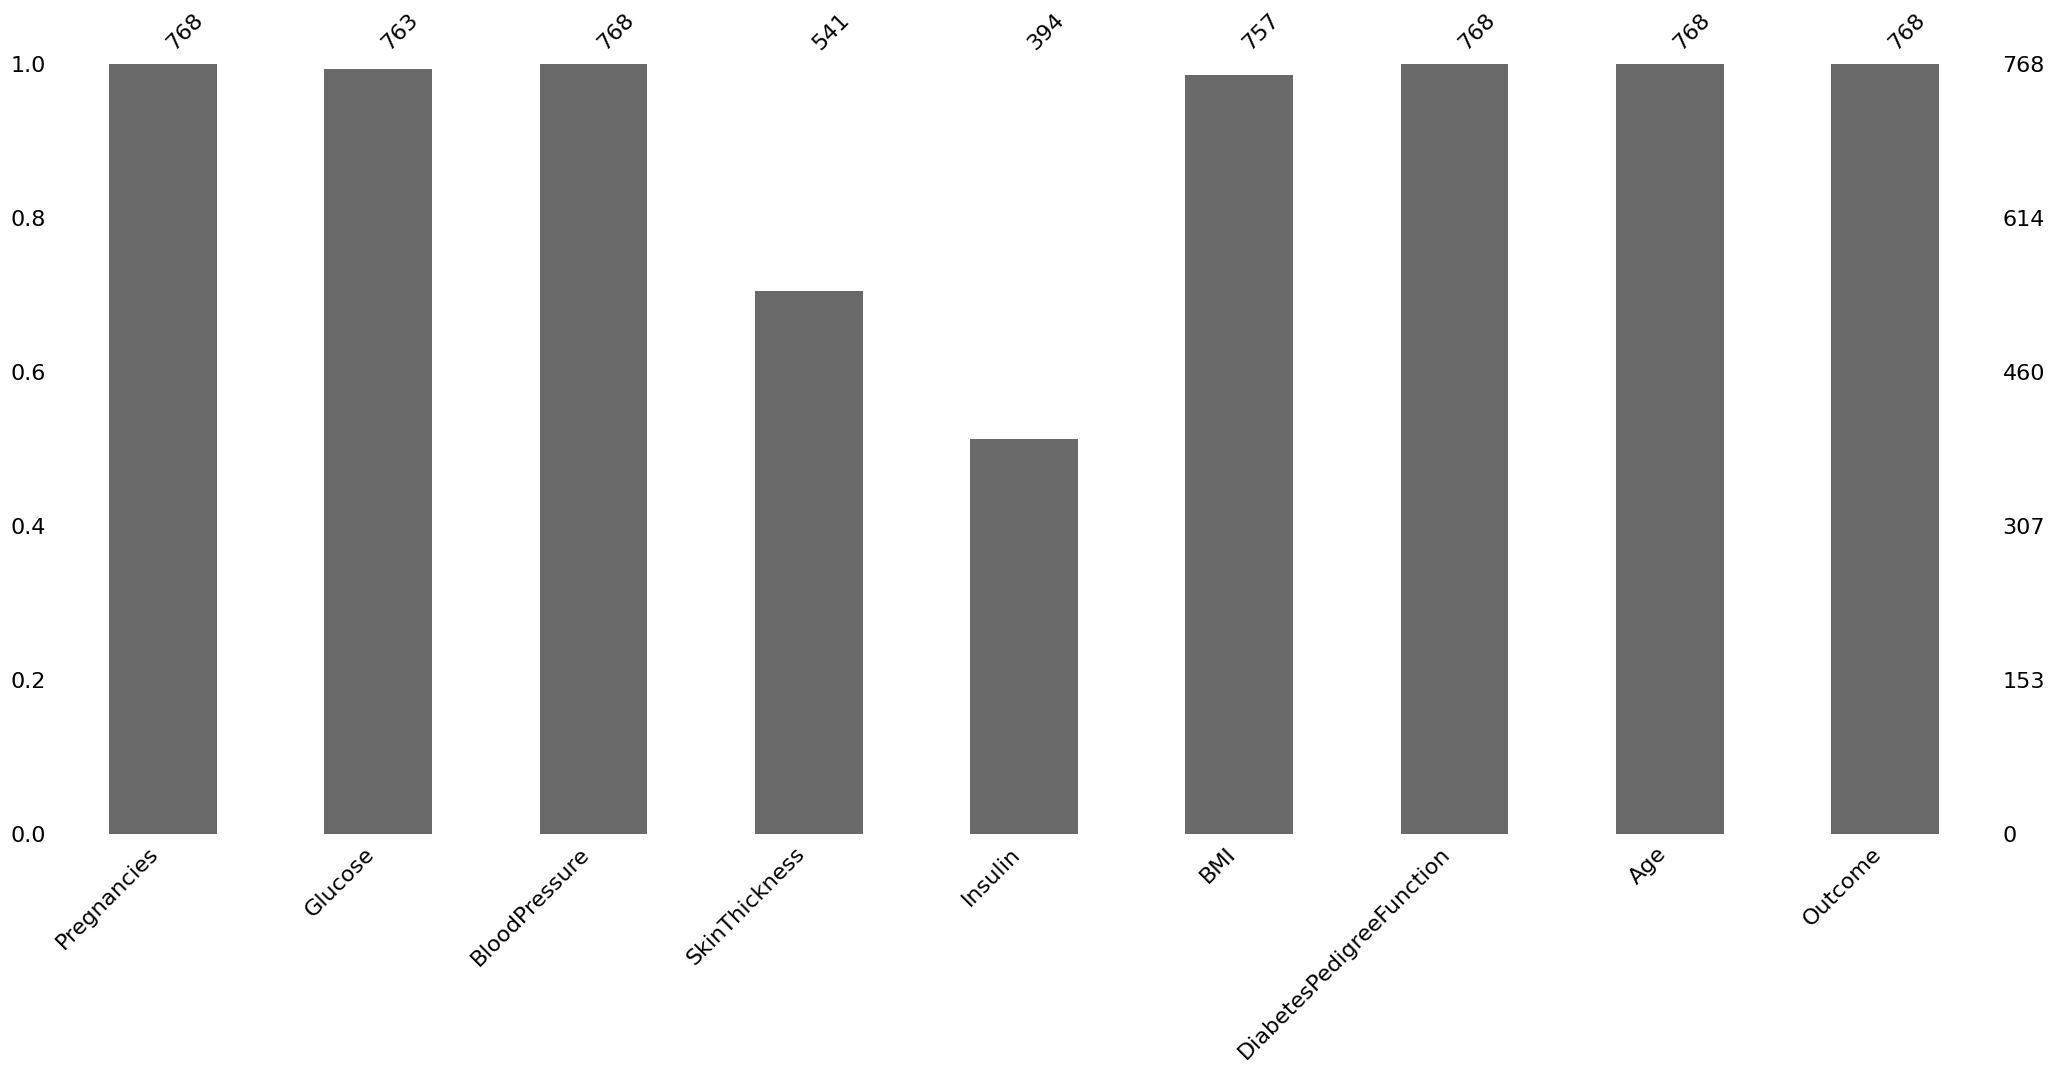

In [ ]:
# Plotting
import missingno as msno
msno.bar(df_copy);

In [ ]:
def median_target(var):
    temp = df_copy[df_copy[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
columns = df_copy.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df_copy.loc[(df_copy['Outcome'] == 0 ) & (df_copy[i].isnull()), i] = median_target(i)[i][0]
    df_copy.loc[(df_copy['Outcome'] == 1 ) & (df_copy[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

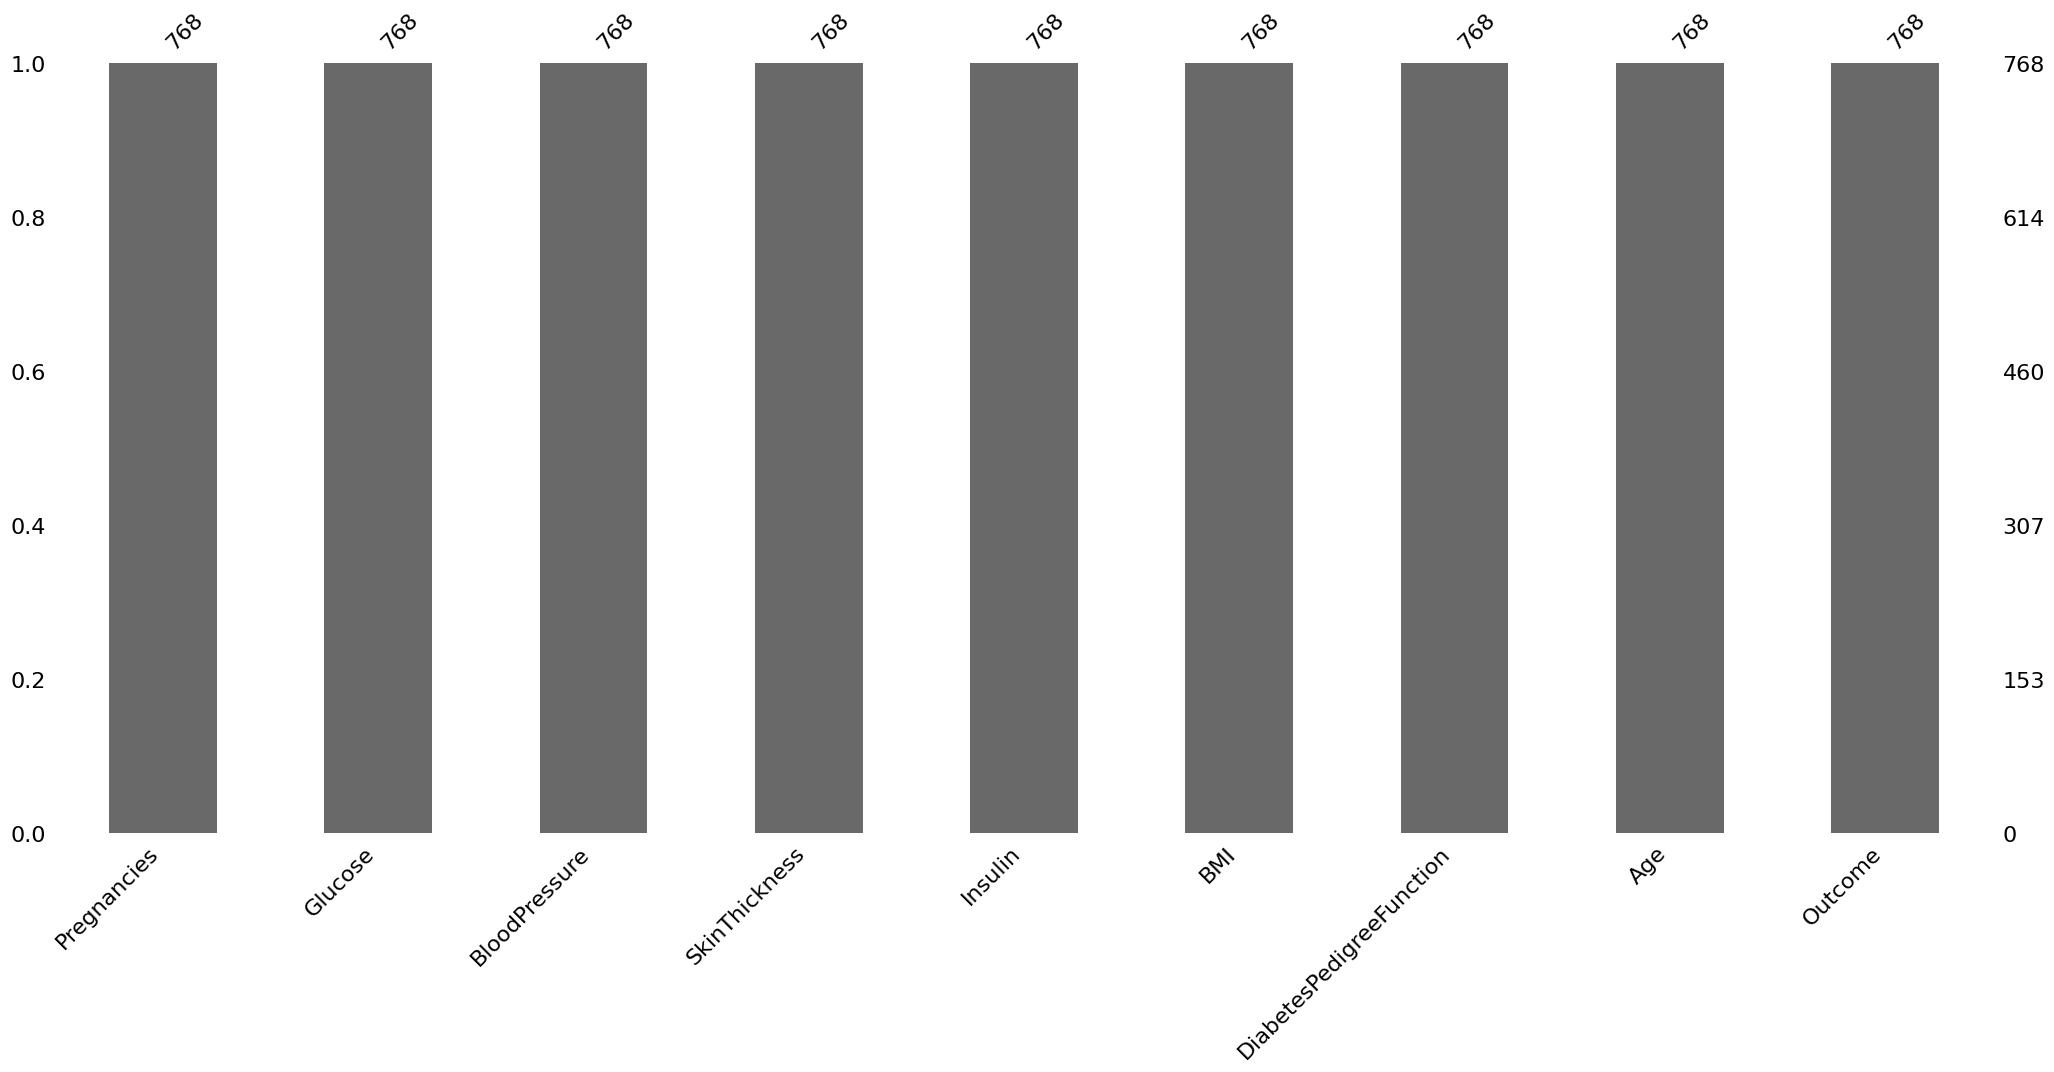

In [ ]:
# Plotting
import missingno as msno
msno.bar(df_copy);

In [ ]:

for feature in df_copy.columns:
    Q1 = df_copy[feature].quantile(0.25)
    Q3 = df_copy[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[feature] > upper) | (df_copy[feature] < lower)]

    if not outliers.empty:
        print(f"{feature}: yes")

    else:
        print(f"{feature}: no")

Pregnancies: yes
Glucose: no
BloodPressure: yes
SkinThickness: yes
Insulin: yes
BMI: yes
DiabetesPedigreeFunction: yes
Age: yes
Outcome: no


<Axes: xlabel='BloodPressure'>

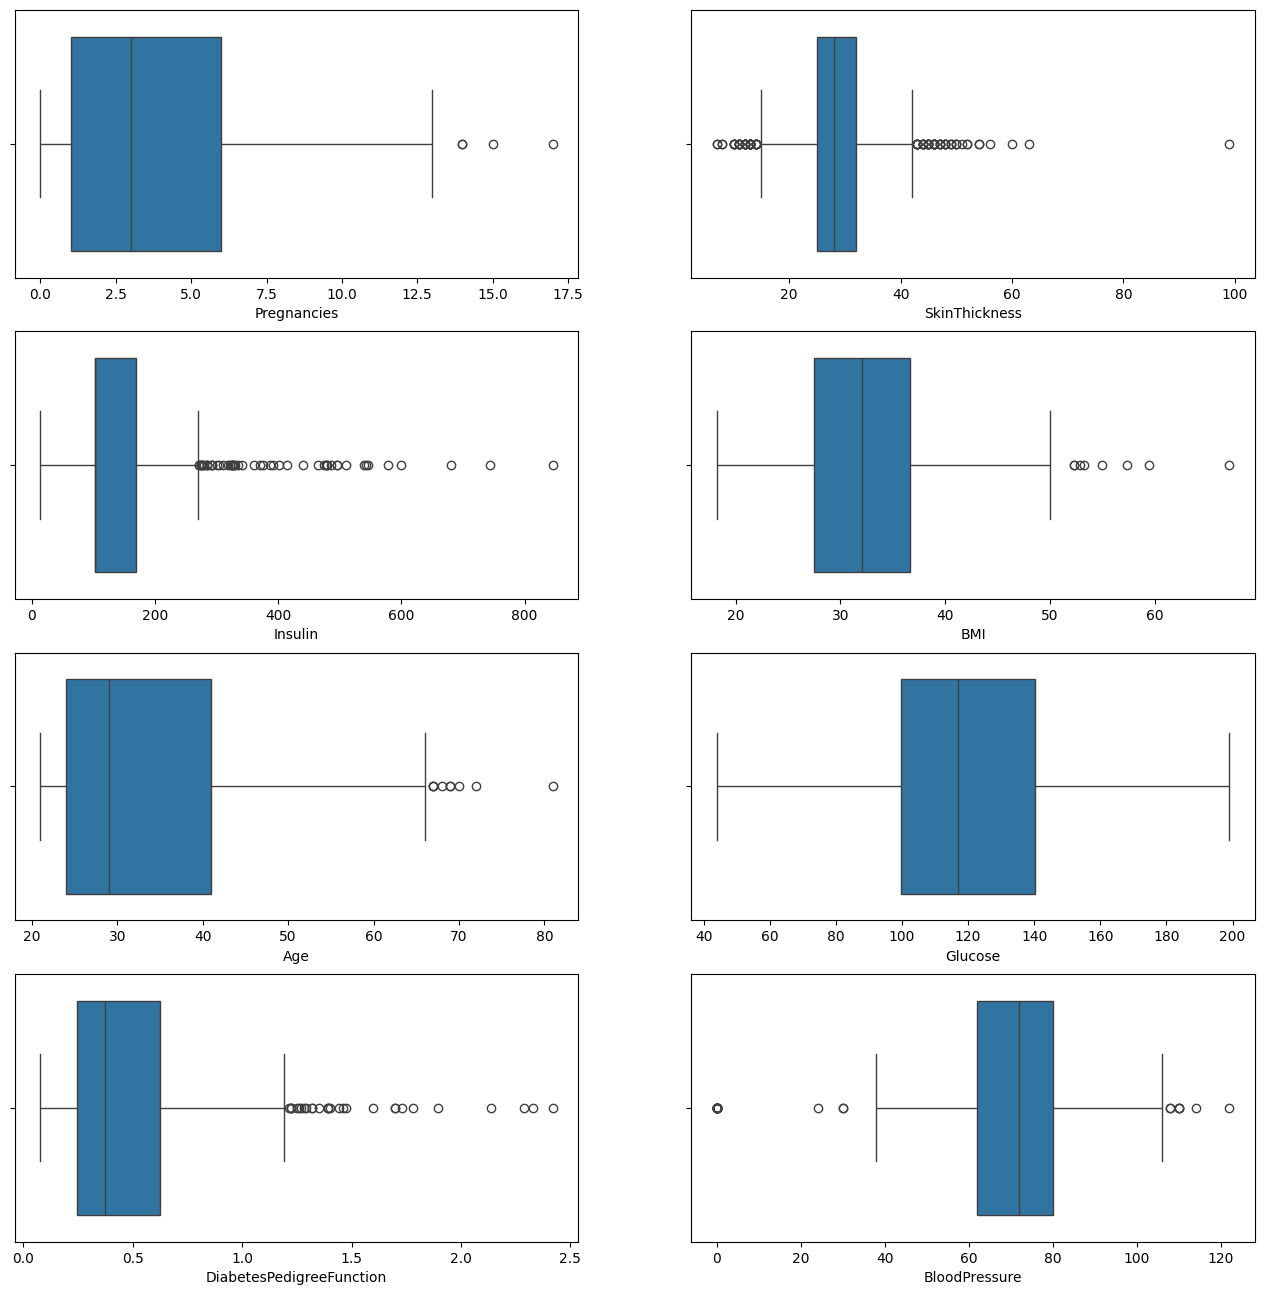

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.boxplot(x = df_copy['Pregnancies'], ax=ax[0,0])
sns.boxplot(x = df_copy['SkinThickness'], ax=ax[0,1])
sns.boxplot(x = df_copy['Insulin'], ax=ax[1,0])
sns.boxplot(x = df_copy['BMI'], ax=ax[1,1])
sns.boxplot(x = df_copy['Age'], ax=ax[2,0])
sns.boxplot(x = df_copy['Glucose'], ax=ax[2,1])
sns.boxplot(x = df_copy['DiabetesPedigreeFunction'], ax=ax[3,0])
sns.boxplot(x = df_copy['BloodPressure'], ax=ax[3,1])


In [ ]:
Q1 = df_copy.Insulin.quantile(0.25)
Q3 = df_copy.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Insulin"] > upper,"Insulin"] = upper

In [ ]:
Q1 = df_copy.BMI.quantile(0.25)
Q3 = df_copy.BMI.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["BMI"] > upper,"BMI"] = upper

In [ ]:
Q1 = df_copy.Age.quantile(0.25)
Q3 = df_copy.Age.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Age"] > upper,"Age"] = upper

In [ ]:
Q1 = df_copy.SkinThickness.quantile(0.25)
Q3 = df_copy.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["SkinThickness"] > upper,"SkinThickness"] = upper

In [ ]:
Q1 = df_copy.Pregnancies.quantile(0.25)
Q3 = df_copy.Pregnancies.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Pregnancies"] > upper,"Pregnancies"] = upper

In [ ]:
Q1 = df_copy.BloodPressure.quantile(0.25)
Q3 = df_copy.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["BloodPressure"] > upper,"BloodPressure"] = upper

In [ ]:
Q1 = df_copy.Glucose.quantile(0.25)
Q3 = df_copy.Glucose.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["Glucose"] > upper,"Glucose"] = upper

In [ ]:
Q1 = df_copy.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df_copy.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df_copy.loc[df_copy["DiabetesPedigreeFunction"] > upper,"DiabetesPedigreeFunction"] = upper

In [ ]:
 #We determine outliers between all variables with the LOF method
#from sklearn.neighbors import LocalOutlierFactor
#lof =LocalOutlierFactor(n_neighbors= 10)
#lof.fit_predict(df)


In [ ]:
#df_scores = lof.negative_outlier_factor_
#np.sort(df_scores)[0:30]

In [ ]:
#We choose the threshold value according to lof scores
#threshold = np.sort(df_scores)[7]
#threshold

In [ ]:
#We delete those that are higher than the threshold
#outlier = df_scores > threshold
#df = df[outlier]

In [ ]:
# The size of the data set was examined.
#df.shape

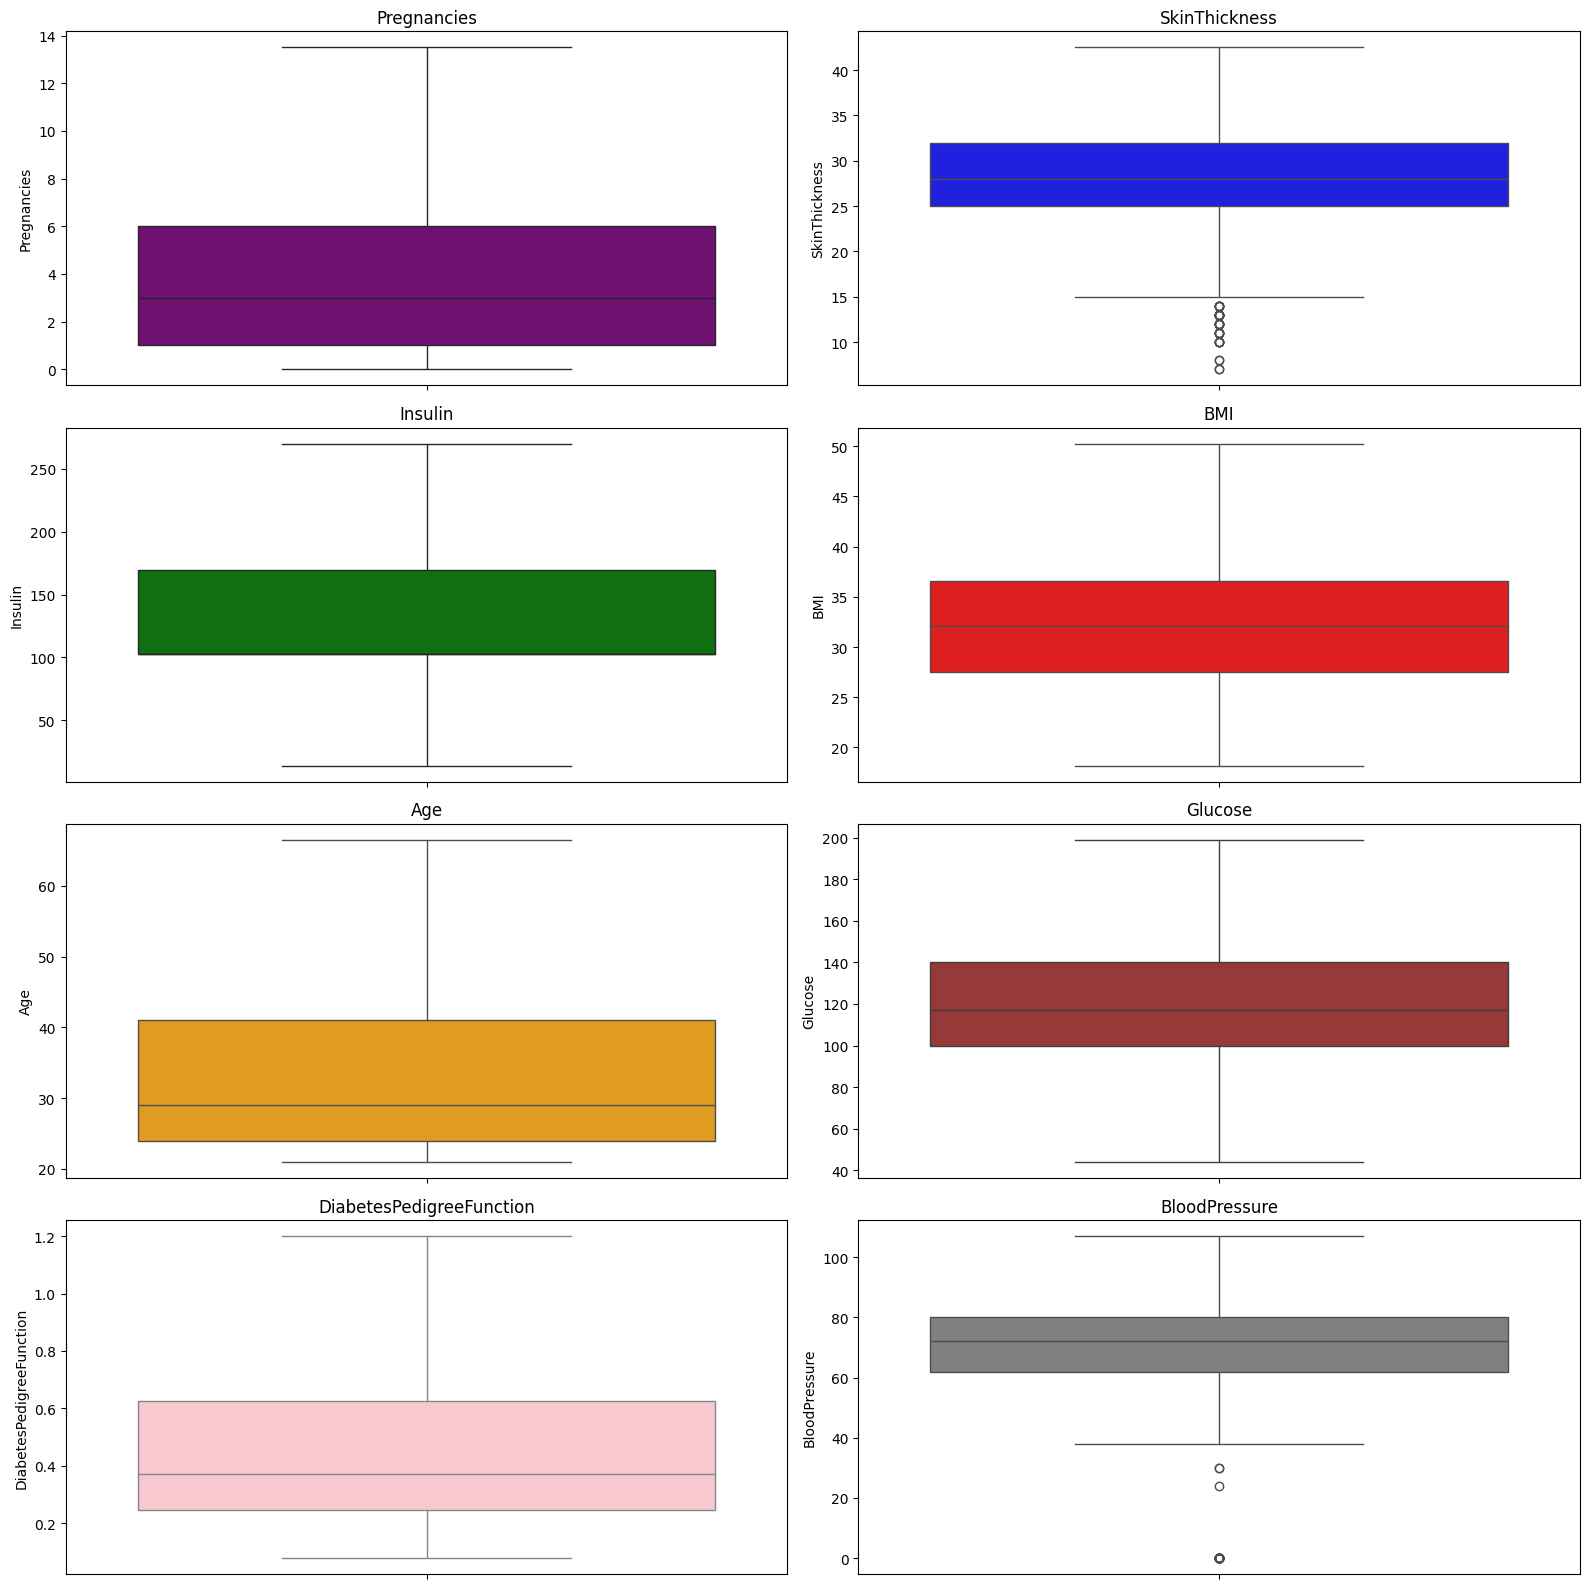

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_copy is your DataFrame
fig, ax = plt.subplots(4, 2, figsize=(16, 16))  # Adjust figsize as needed

# Define colors for each boxplot
colors = ['purple', 'blue', 'green', 'red', 'orange', 'brown', 'pink', 'grey']

# Plot each boxplot with the specified color
sns.boxplot(y=df_copy['Pregnancies'], ax=ax[0, 0], color=colors[0])
sns.boxplot(y=df_copy['SkinThickness'], ax=ax[0, 1], color=colors[1])
sns.boxplot(y=df_copy['Insulin'], ax=ax[1, 0], color=colors[2])
sns.boxplot(y=df_copy['BMI'], ax=ax[1, 1], color=colors[3])
sns.boxplot(y=df_copy['Age'], ax=ax[2, 0], color=colors[4])
sns.boxplot(y=df_copy['Glucose'], ax=ax[2, 1], color=colors[5])
sns.boxplot(y=df_copy['DiabetesPedigreeFunction'], ax=ax[3, 0], color=colors[6])
sns.boxplot(y=df_copy['BloodPressure'], ax=ax[3, 1], color=colors[7])

# Set titles for each subplot for clarity
ax[0, 0].set_title('Pregnancies')
ax[0, 1].set_title('SkinThickness')
ax[1, 0].set_title('Insulin')
ax[1, 1].set_title('BMI')
ax[2, 0].set_title('Age')
ax[2, 1].set_title('Glucose')
ax[3, 0].set_title('DiabetesPedigreeFunction')
ax[3, 1].set_title('BloodPressure')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
X = df_copy.drop('Outcome' ,axis=1)
y = df_copy['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35.0,169.5,33.6,0.627,50.0
1,1.0,85.0,66,29.0,102.5,26.6,0.351,31.0
2,8.0,183.0,64,32.0,169.5,23.3,0.672,32.0
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0


In [ ]:
scaler = MinMaxScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
#joblib.dump(scaler, 'min_max_scaler.pkl')

In [ ]:
#joblib.dump(X, 'Scaled_data.pkl')

In [ ]:
#Scaled_data  = joblib.load('Scaled_data.pkl')

In [ ]:
#Scaled_data.head()

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.444444,0.670968,0.672897,0.788732,0.607422,0.480499,0.489305,0.637363
1,0.074074,0.264516,0.616822,0.619718,0.345703,0.262090,0.243316,0.219780
2,0.592593,0.896774,0.598131,0.704225,0.607422,0.159126,0.529412,0.241758
3,0.074074,0.290323,0.616822,0.450704,0.312500,0.308892,0.079323,0.000000
4,0.000000,0.600000,0.373832,0.788732,0.601562,0.776911,1.000000,0.263736


In [ ]:
# Apply SMOTE on the entire dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
y_smote.shape

(1000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Machine Learning Models

#Training models with (Random search) hyper parameter tuning

In [ ]:
models = {
    'RF': (RandomForestClassifier(), {
    'n_estimators': [21],
    'max_features': ['sqrt'],
    'max_depth': [5] + [None],
    'min_samples_split': [20],
    'min_samples_leaf': [5],
    }),
    'SVM': (SVC(probability=True), {
         'C': [5],
         'gamma': [0.001],
          'kernel': [ 'rbf']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [21],
        'weights': ['uniform'],
        'p': [1, 2] # 1 for Manhattan distance, 2 for Euclidean distance
    }),
    'GB': (GradientBoostingClassifier(), {
         'n_estimators': [57],
          'learning_rate': [0.01],
          'max_depth': [7],
          'min_samples_leaf': [4],
          'subsample': [0.5],
    }),
    'DT': (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [10],
        'min_samples_split': [18],
        'min_samples_leaf': [5],
        'max_features': ['log2']
    })
}

In [ ]:
results = {}

for name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'F1_Score': f1,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp
    }



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


# Printing Testing accuracy of all base models

In [ ]:
print("RandomForest Accuracy: ", results['RF']['accuracy'])
print("SVM Accuracy: ", results['SVM']['accuracy'])
print("KNN Accuracy: ", results['KNN']['accuracy'])
print("GradientBoosting Accuracy: ", results['GB']['accuracy'])
print("DecisionTree Accuracy: ", results['DT']['accuracy'])


print("\nRandomForest precision: ", results['RF']['precision'])
print("SVM precision: ", results['SVM']['precision'])
print("KNN precision: ", results['KNN']['precision'])
print("GradientBoosting precision: ", results['GB']['precision'])
print("DecisionTree precision: ", results['DT']['precision'])

print("\nandomForest recall: ", results['RF']['recall'])
print("SVM recall: ", results['SVM']['recall'])
print("KNN recall: ", results['KNN']['recall'])
print("GradientBoosting recall: ", results['GB']['recall'])
print("DecisionTree recall: ", results['DT']['recall'])

print("\nRandomForest F1_Score: ", results['RF']['F1_Score'])
print("SVM F1_Score: ", results['SVM']['F1_Score'])
print("KNN F1_Score: ", results['KNN']['F1_Score'])
print("GradientBoosting F1_Score: ", results['GB']['F1_Score'])
print("DecisionTree F1_Score: ", results['DT']['F1_Score'])

RandomForest Accuracy:  83.5
SVM Accuracy:  79.0
KNN Accuracy:  83.0
GradientBoosting Accuracy:  85.0
DecisionTree Accuracy:  84.5

RandomForest precision:  83.33333333333334
SVM precision:  79.20792079207921
KNN precision:  81.30841121495327
GradientBoosting precision:  86.5979381443299
DecisionTree precision:  86.45833333333334

andomForest recall:  84.15841584158416
SVM recall:  79.20792079207921
KNN recall:  86.13861386138613
GradientBoosting recall:  83.16831683168317
DecisionTree recall:  82.17821782178217

RandomForest F1_Score:  83.74384236453201
SVM F1_Score:  79.20792079207921
KNN F1_Score:  83.65384615384616
GradientBoosting F1_Score:  84.84848484848486
DecisionTree F1_Score:  84.26395939086294


# Hybrid Model (Voting Classifier)

In [ ]:
# Create the VotingClassifier with soft voting
#voting_clf = VotingClassifier(estimators=[(name, best_estimators[name]) for name in best_estimators.keys()], voting='soft')
#voting_clf.fit(X_train, y_train)


# Tuning of Hybrid Model with Random Search CV

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the best estimators from RandomizedSearchCV
best_estimators = {}

for name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=200,  # Increased iterations
                                       cv=10, verbose=2, random_state=42, n_jobs=-1)  # Increased cross-validation folds
    random_search.fit(X_train, y_train)
    best_estimators[name] = random_search.best_estimator_

# Define hyperparameters for the VotingClassifier
voting_param_dist = {
    'voting': ['soft'],  # Include 'hard' voting as an option
    'weights': [None, [1, 1, 1, 2, 2], [1, 1, 1, 3, 3], [1, 2, 2, 3, 3]],  # Experiment with different weights
    'n_jobs': [-1],
}

# Perform Randomized Search to find the best hyperparameters for VotingClassifier
random_search_voting = RandomizedSearchCV(VotingClassifier(estimators=[(name, best_estimators[name]) for name in best_estimators.keys()]),
                                          param_distributions=voting_param_dist, n_iter=100, cv=10,
                                          random_state=42, n_jobs=-1)
random_search_voting.fit(X_train, y_train)

# Get the best VotingClassifier
best_voting_clf = random_search_voting.best_estimator_

# Print the best parameters
print("Best parameters found for Voting Classifier: ", random_search_voting.best_params_)

# Evaluate the hybrid model
y_pred = best_voting_clf.predict(X_test)
y_pred_prob = best_voting_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
voting_accuracy = accuracy_score(y_test, y_pred) * 100
voting_precision = precision_score(y_test, y_pred) * 100
voting_recall = recall_score(y_test, y_pred) * 100
voting_f1 = f1_score(y_test, y_pred) * 100

voting_fpr, voting_tpr, _ = roc_curve(y_test, y_pred_prob)
voting_roc_auc = auc(voting_fpr, voting_tpr)
voting_tn, voting_fp, voting_fn, voting_tp = confusion_matrix(y_test, y_pred).ravel()

# Print the metrics
print("Hybrid Model (Voting Classifier) Metrics:")
print(f"Accuracy: {voting_accuracy:.2f}%")
print(f"Precision: {voting_precision:.2f}%")
print(f"Recall: {voting_recall:.2f}%")
print(f"F1 Score: {voting_f1:.2f}%")
print(f"ROC AUC: {voting_roc_auc:.2f}")


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best parameters found for Voting Classifier:  {'weights': [1, 1, 1, 2, 2], 'voting': 'soft', 'n_jobs': -1}
Hybrid Model (Voting Classifier) Metrics:
Accuracy: 84.50%
Precision: 83.65%
Recall: 86.14%
F1 Score: 84.88%
ROC AUC: 0.93


# Training Accuracy of hybrid model

In [ ]:
# Evaluate the hybrid model
y_pred = best_voting_clf.predict(X_train)

In [ ]:
voting_Training_accuracy = accuracy_score(y_train, y_pred) * 100

In [ ]:
print("Training Accuracy of Voting Classifier: ", voting_Training_accuracy)

Training Accuracy of Voting Classifier:  92.25


In [ ]:
# Prepare results for the hybrid model
results['RaSK_GraDe'] = {
    'accuracy': voting_accuracy,
    'precision': voting_precision,
    'recall': voting_recall,
    'F1_Score': voting_f1,
    'fpr': voting_fpr,
    'tpr': voting_tpr,
    'roc_auc': voting_roc_auc,
    'tn': voting_tn,
    'fp': voting_fp,
    'fn': voting_fn,
    'tp': voting_tp
}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Base models
base_models = [
    ('RandomForest', best_estimators['RF']),
    ('SVM', best_estimators['SVM']),
    ('KNN', best_estimators['KNN']),
    ('GradientBoosting', best_estimators['GB']),
    ('DecisionTree', best_estimators['DT'])
]

# Meta-model
meta_model = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=10,    # You can adjust the number of cross-validation folds
    n_jobs=-1
)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the hybrid model
y_pred = stacking_clf.predict(X_test)
y_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
stacking_accuracy = accuracy_score(y_test, y_pred) * 100
stacking_precision = precision_score(y_test, y_pred) * 100
stacking_recall = recall_score(y_test, y_pred) * 100
stacking_f1 = f1_score(y_test, y_pred) * 100

stacking_fpr, stacking_tpr, _ = roc_curve(y_test, y_pred_prob)
stacking_roc_auc = auc(stacking_fpr, stacking_tpr)
stacking_tn, stacking_fp, stacking_fn, stacking_tp = confusion_matrix(y_test, y_pred).ravel()

# Print the metrics
print("Hybrid Model (Stacking) Metrics:")
print(f"Accuracy: {stacking_accuracy:.2f}%")
print(f"Precision: {stacking_precision:.2f}%")
print(f"Recall: {stacking_recall:.2f}%")
print(f"F1 Score: {stacking_f1:.2f}%")
print(f"ROC AUC: {stacking_roc_auc:.2f}")


Hybrid Model (Stacking) Metrics:
Accuracy: 85.50%
Precision: 86.73%
Recall: 84.16%
F1 Score: 85.43%
ROC AUC: 0.94


In [ ]:
results['RaSK_GraDeL'] = {
    'accuracy': stacking_accuracy,
    'precision': stacking_precision,
    'recall': stacking_recall,
    'F1_Score': stacking_f1,
    'fpr': stacking_fpr,
    'tpr': stacking_tpr,
    'roc_auc': stacking_roc_auc,
    'tn': stacking_tn,
    'fp': stacking_fp,
    'fn': stacking_fn,
    'tp': stacking_tp
}


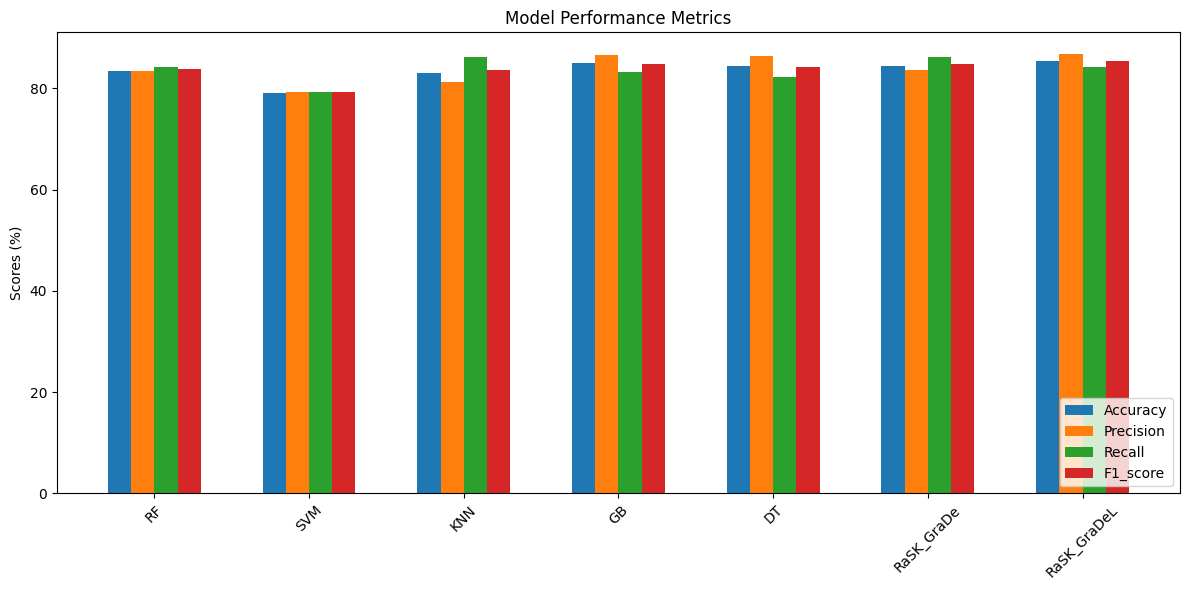

In [ ]:
metrics = ['accuracy', 'precision', 'recall', 'F1_Score']
models = list(results.keys())
num_models = len(models)
num_metrics = len(metrics)

# Define the width of each bar and the positions
bar_width = 0.15
indices = np.arange(num_models)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric as a separate group of bars
for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in results.keys()]
    bar_positions = indices + i * bar_width
    bars = ax.bar(bar_positions, values, bar_width, label=metric.capitalize())

# Set the position of the x ticks
ax.set_xticks(indices + bar_width * (num_metrics - 1) / 2)
ax.set_xticklabels(models, rotation=45)

# Set the labels and title
ax.set_ylabel('Scores (%)')
ax.set_title('Model Performance Metrics')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


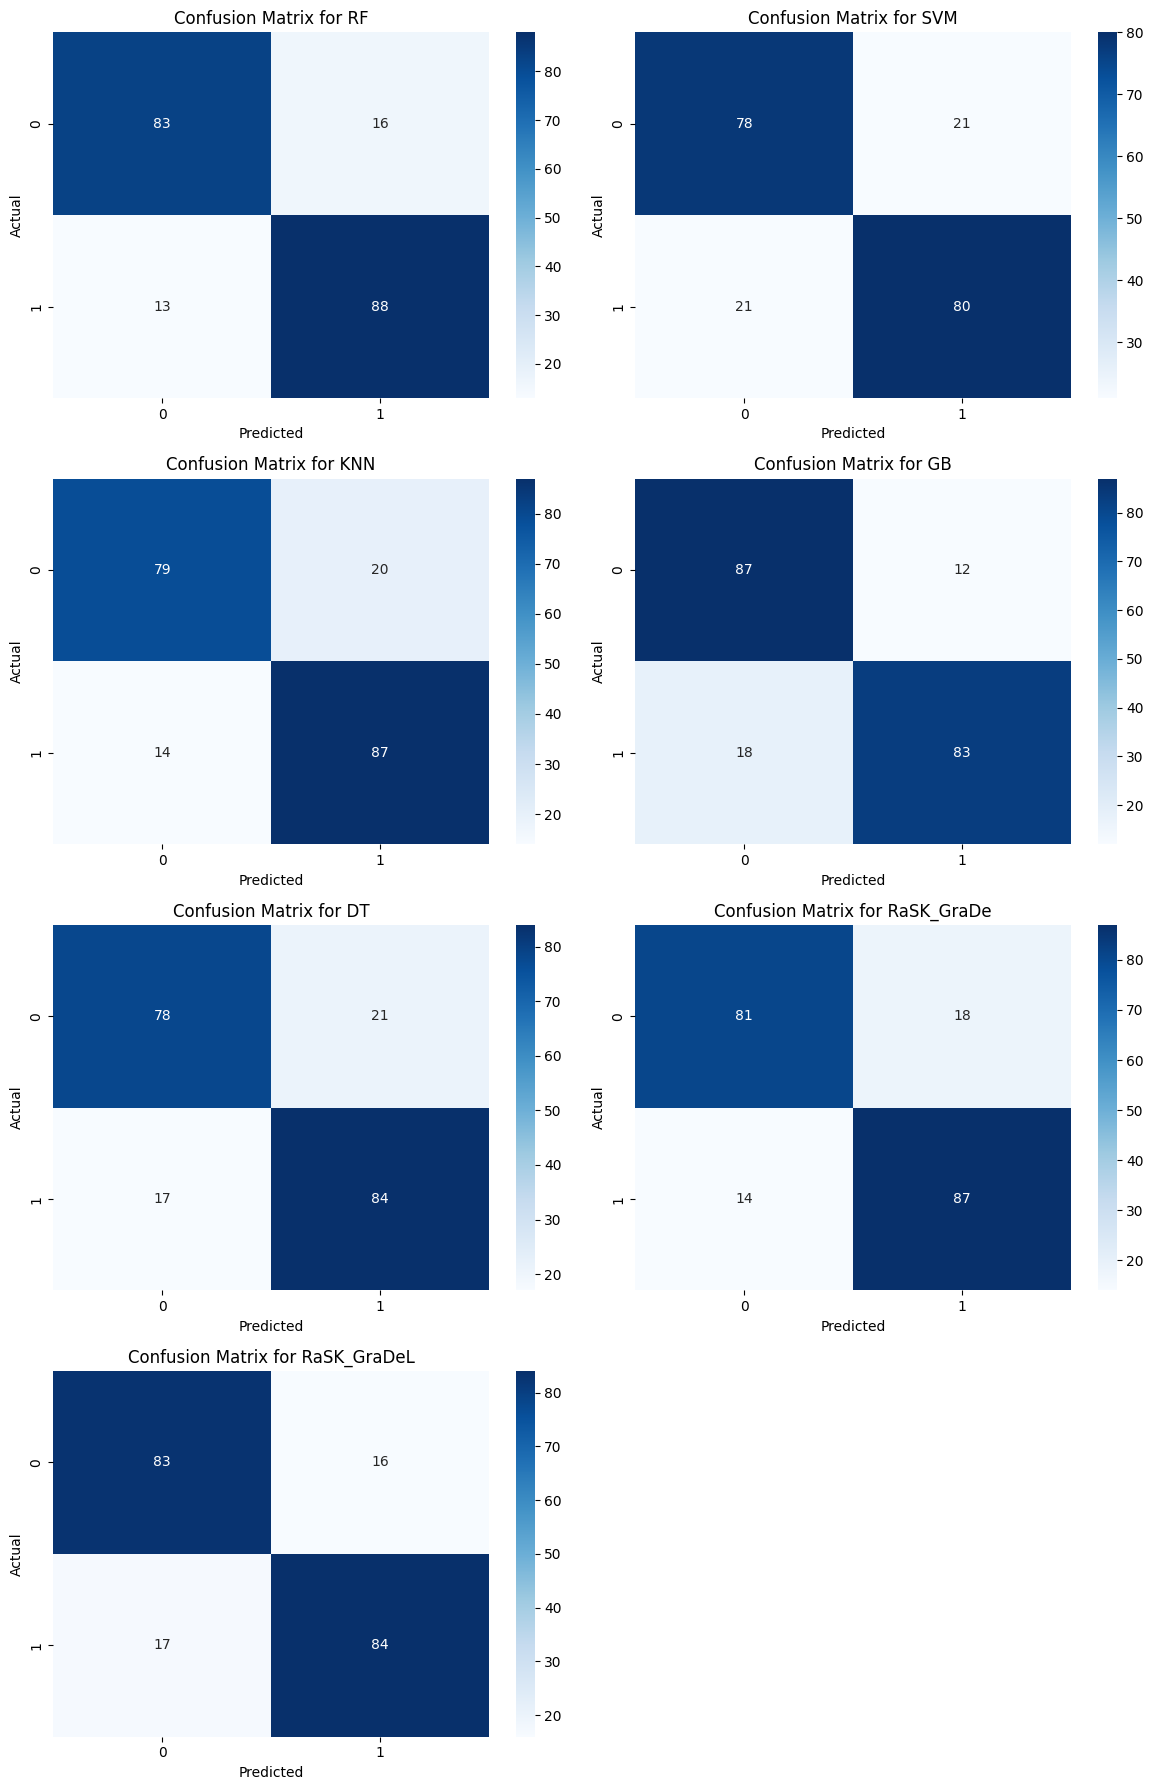

In [ ]:
# Update the Confusion Matrix Plot
fig, ax = plt.subplots(4, 2, figsize=(12, 18))

# Plot confusion matrices
for i, model in enumerate(results.keys()):
    if i >= 7: break  # Ensure we don't exceed the number of subplots
    cm = np.array([[results[model]['tn'], results[model]['fp']], [results[model]['fn'], results[model]['tp']]])
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[i//2, i%2], cmap='Blues')
    ax[i//2, i%2].set_title(f'Confusion Matrix for {model}')
    ax[i//2, i%2].set_xlabel('Predicted')
    ax[i//2, i%2].set_ylabel('Actual')

# Remove any unused subplots (in this case, the last one)
if len(results) < 8:
    for j in range(len(results), 8):
        fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()


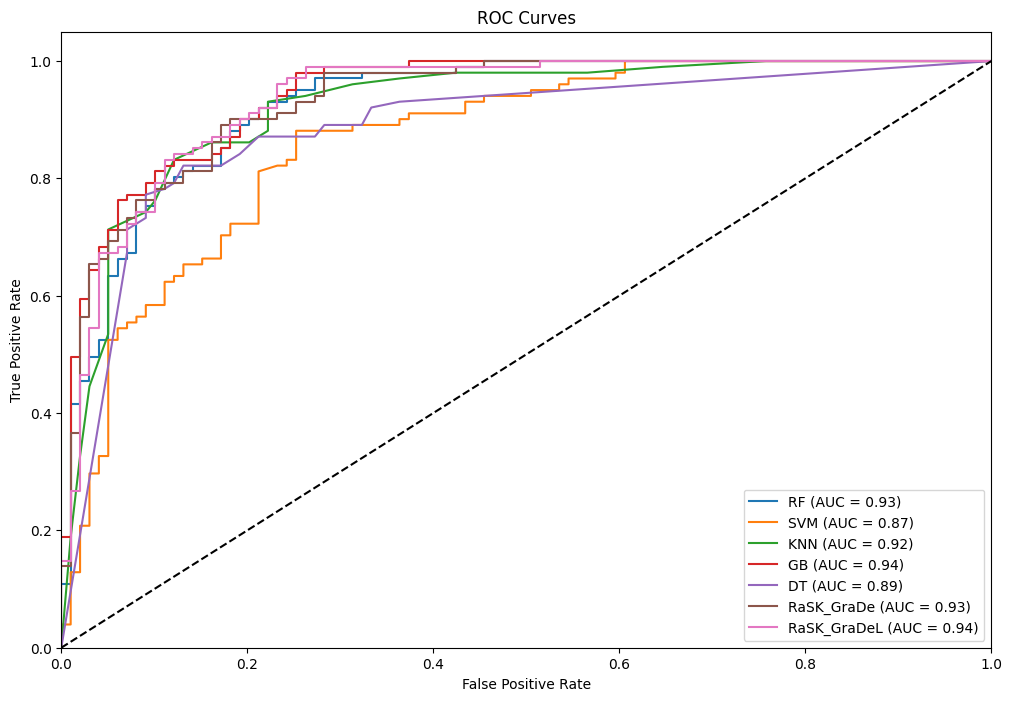

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for model in results.keys():
    ax.plot(results[model]['fpr'], results[model]['tpr'], label=f'{model} (AUC = {results[model]["roc_auc"]:.2f})')

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc='lower right')
plt.show()